## **II. Tiền xử lý dữ liệu (Data Preprocessing)**

### 1. Xử lý tập dữ liệu từ **batdongsan.com**

#### a. Đọc dữ liệu từ file

In [324]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [325]:
# Load the uploaded property listing CSV file
file_path = '.\data.csv' 
df = pd.read_csv(file_path)
df.head()

,Title,Price,Address,Price per m2,Area,Bedrooms,Toilets,Published At,Diện tích,Mức giá,...,Ngày đăng,Ngày hết hạn,Loại tin,Mã tin,Project Title,Status,Number of Apartments,Number of Buildings,Developer,Project Address
0,NaN,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",NaN,40 m²,6 phòng,4 phòng,17/10/2024,40 m²,"15,2 tỷ",...,17/10/2024,24/10/2024,Tin VIP Bạc,39211626,NaN,NaN,NaN,NaN,NaN,"Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ..."
1,Screc Tower,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",NaN,90 m²,3 phòng,2 phòng,23/10/2024,90 m²,"5,6 tỷ",...,23/10/2024,02/11/2024,Tin thường,41292074,Screc Tower,đã bàn giao,60-106 m²,468,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,"Screc Tower, Đường Trường Sa, Phường 12, Quận ..."
2,HaDo Centrosa Garden,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",NaN,87 m²,2 phòng,2 phòng,23/10/2024,87 m²,7 tỷ,...,23/10/2024,30/10/2024,Tin VIP Kim Cương,38439702,HaDo Centrosa Garden,Đã bàn giao,2.178,8,Tập đoàn Hà Đô,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ..."
3,NaN,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",NaN,60 m²,4 phòng,NaN,22/10/2024,60 m²,"12,35 tỷ",...,22/10/2024,01/11/2024,Tin thường,41151459,NaN,NaN,NaN,NaN,NaN,"Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh"
4,NaN,Thỏa thuận,"Đường Xa Lộ Hà Nội, Phường Hiệp Phú, Quận 9, H...",NaN,2.000 m²,NaN,NaN,18/10/2024,2.000 m²,Thỏa thuận,...,18/10/2024,28/10/2024,Tin thường,41253392,NaN,NaN,NaN,NaN,NaN,"Đường Xa Lộ Hà Nội, Phường Hiệp Phú, Quận 9, H..."


#### b. Kiểm tra tính nhất quán của dữ liệu


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 9144 non-null   object
 1   Price                 30360 non-null  object
 2   Address               30360 non-null  object
 3   Price per m2          12 non-null     object
 4   Area                  30358 non-null  object
 5   Bedrooms              20632 non-null  object
 6   Toilets               19720 non-null  object
 7   Published At          30360 non-null  object
 8   Diện tích             30358 non-null  object
 9   Mức giá               30360 non-null  object
 10  Hướng nhà             7640 non-null   object
 11  Hướng ban công        4677 non-null   object
 12  Ngày đăng             30360 non-null  object
 13  Ngày hết hạn          30360 non-null  object
 14  Loại tin              30360 non-null  object
 15  Mã tin                30360 non-null

**Nhận xét:**

- Tổng quan chúng ta có 30, 060 dòng dữ liệu được thu thập.

- Có rất nhiều cột có giá trị null chiếm phấn lớn cần loại bỏ như: Price per m2,...

- Các cột Price, Area, Toilets, Bedrooms,... đang có kiểu dữ liệu hoặc format không phù hợp cho việc phân tích.

- Một số cột chứa các giá trị trùng lặp với các cột khác.

**Giải pháp:**

-  Xóa các cột có tỷ lệ null trên 40%. Sử dụng các biện pháp điền dữ liệu thiếu để điền cho các cột có tỷ lệ null đạt yêu cầu.

- Chuyển các cột Price, Area, Toilets, Bedrooms,... sang kiểu dữ liệu phù hợp cho việc phân tích (ví dụ: float, int).

- Xóa các cột trùng lặp hoặc không cần thiết cho quá trình phân tích dữ liệu trong tập dữ liệu. 

In [327]:
df.duplicated().sum()

17840

**Nhận xét**:

- Dữ liệu thu thập bị trùng lặp đến 17840 dòng

**Giải pháp:**

- Chỉ giữ lại một dòng dữ liệu duy nhất cho mỗi mã tin, loại bỏ các dòng trùng lặp.

#### c. Xử lý dữ liệu thiếu và trùng lặp

##### **Loại bỏ các dòng bị trùng lặp dựa trên mã tin**

In [328]:
df.drop_duplicates(subset=['Mã tin'], keep='first', inplace=True)
df.duplicated().sum()

0

##### **Điền dữ liệu cho các cột : Developer và Status**
- Cá nhân và môi giới sẽ không điền vào trường nhà đầu tư 
- Các hạng mục đã bàn giao thường không điền vào trường trạng thái

In [329]:
# Fill missing values in 'Developer' and 'Status' columns with default values.
df.loc[df[['Developer', 'Status']].isnull().all(axis=1), ['Developer', 'Status']] = ['cá nhân/môi giới', 'Đã bàn giao']

##### **Loại bỏ các cột dữ liệu thiếu quá nhiều dữ liệu (ngưỡng là 40%)**

In [330]:
# Calculate the null percentage 
null_percentage = df.isnull().mean() * 100

# Define columns with more than 40% null values
columns_to_drop = null_percentage[null_percentage > 40].index

# Drop columns with high ratio of null values
df = df.drop(columns=columns_to_drop)
print("Columns with more than 40% null values have been dropped.")

# Print the result of ratio
print(null_percentage)

Columns with more than 40% null values have been dropped.
Title                   69.162783
Price                    0.000000
Address                  0.000000
Price per m2            99.991965
Area                     0.008035
Bedrooms                34.099309
Toilets                 37.289089
Published At             0.000000
Diện tích                0.008035
Mức giá                  0.000000
Hướng nhà               74.843323
Hướng ban công          85.312550
Ngày đăng                0.000000
Ngày hết hạn             0.000000
Loại tin                 0.000000
Mã tin                   0.000000
Project Title           69.162783
Status                   0.000000
Number of Apartments    69.162783
Number of Buildings     79.286518
Developer                0.000000
Project Address          0.000000
dtype: float64


##### **Kiểm tra quá trình xử lý**

In [331]:
df.isnull().sum()

Price                 0
Address               0
Area                  1
Bedrooms           4244
Toilets            4641
Published At          0
Diện tích             1
Mức giá               0
Ngày đăng             0
Ngày hết hạn          0
Loại tin              0
Mã tin                0
Status                0
Developer             0
Project Address       0
dtype: int64

**Nhận xét:**

- Cột Bedrooms, Toilets và Diện tích (Area) vẫn còn dữ liệu thiếu, cần xử lý sâu hơn để giải quyết vấn đề. 

**Giải pháp :**

- Chỉ có 1 cell dữ liệu Area (Diện tích) là null, ta có thể loại bỏ nó mà không ảnh hưởng lớn đến quá trình phân tích

- Xử lý dữ liệu thiếu các cột còn lại bằng cách sử dụng phương pháp trung thực (Mean Imputation) hoặc phương pháp thay thế tuyến tính (Regression Imputation) để dự đoán giá trị thiếu


##### **Loại bỏ dữ liệu thiếu trong cột Area (Diện tích)**


In [332]:
df.dropna(subset=["Area", "Diện tích"], inplace=True)
df.isnull().sum()

Price                 0
Address               0
Area                  0
Bedrooms           4243
Toilets            4640
Published At          0
Diện tích             0
Mức giá               0
Ngày đăng             0
Ngày hết hạn          0
Loại tin              0
Mã tin                0
Status                0
Developer             0
Project Address       0
dtype: int64

##### **Loại bỏ các cột dữ liệu trùng lặp hoặc không cần thiết cho quá trình phân tích**

- Các cột trùng lặp như:

    - Diện tích trùng lặp với Area

    - Mức giá trùng lặp với Price

    - Ngày đăng trùng lặp với Published At
    
    - Project Address trùng lặp với Address

- Các cột không cần thiết cho quá trình phân tích như:

    - Ngày hết hạn, Mã tin 

In [333]:
df.drop(columns=["Diện tích", "Mức giá", "Ngày đăng", "Ngày hết hạn", "Mã tin", "Project Address"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12445 entries, 0 to 30359
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         12445 non-null  object
 1   Address       12445 non-null  object
 2   Area          12445 non-null  object
 3   Bedrooms      8202 non-null   object
 4   Toilets       7805 non-null   object
 5   Published At  12445 non-null  object
 6   Loại tin      12445 non-null  object
 7   Status        12445 non-null  object
 8   Developer     12445 non-null  object
dtypes: object(9)
memory usage: 972.3+ KB


##### **Loại bỏ các dữ liệu không thuộc thành phố Hồ Chí Minh**

In [334]:
# Lọc các dòng chứa "Hồ Chí Minh" hoặc "Thủ Đức"
df = df[df['Address'].str.contains('Hồ Chí Minh|Thủ Đức', case=False, na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11048 entries, 0 to 30359
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         11048 non-null  object
 1   Address       11048 non-null  object
 2   Area          11048 non-null  object
 3   Bedrooms      7473 non-null   object
 4   Toilets       7138 non-null   object
 5   Published At  11048 non-null  object
 6   Loại tin      11048 non-null  object
 7   Status        11048 non-null  object
 8   Developer     11048 non-null  object
dtypes: object(9)
memory usage: 863.1+ KB


#### d. Chuẩn hóa dữ liệu 

##### **Chuẩn hóa dữ liệu cột Area**

In [335]:
# Clean the 'Area' column
def clean_area(area):
    if isinstance(area, str):
        area = area.replace(' m²', '').replace('.', '').replace(',', '.')
    return pd.to_numeric(area, errors='coerce')

df['Area'] = df['Area'].astype(str).apply(clean_area)

# Loại bỏ các dòng không chuyển đổi được 
df.dropna(subset=['Area'])
df['Area'].dtype

dtype('float64')

##### **Chuẩn hóa dữ liệu cột Price**

In [336]:
# Hàm chuyển đổi giá trị thành tỷ với xử lý trường hợp "triệu/m²"
def convert_to_billion(value, area):
    try:
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')

            # Dữ liệu chỉ đánh giá các bds rao bán nên sẽ không xử lý các bds cho thuê
            if '/tháng' in value:
                return None
            
            # Kiểm tra nếu có "triệu/m²"
            elif 'triệu/m²' in value:
                price_per_sqm = float(value.replace(' triệu/m²', '')) / 1000  # Đổi từ triệu/m² thành tỷ/m²
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Kiểm tra nếu có "triệu/m²"
            elif 'tỷ/m²' in value:
                price_per_sqm = float(value.replace(' tỷ/m²', ''))
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Xử lý các trường hợp có đơn vị "tỷ" hoặc "triệu"
            elif 'tỷ' in value:
                return float(value.replace(' tỷ', ''))
            
            # Chuyển "triệu" thành "tỷ"
            elif 'triệu' in value:
                return float(value.replace(' triệu', '')) / 1000  
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)
        
        return None
        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

# Áp dụng hàm vào cột 'giá_cả' và truyền thêm cột 'diện_tích' để tính giá trị cuối cùng
df['Price'] = df.apply(lambda row: convert_to_billion(row['Price'], row['Area']), axis=1)

# Loại bỏ các dòng không chuyển đổi được
df.dropna(inplace=True, subset="Price")

df["Price"].dtype

dtype('float64')

##### **Chuẩn hóa cột dữ liệu Toilets và Bedrooms**

In [337]:
# Define function to extact number from string
def extract_number(val):
    if pd.isna(val):
        return val
    try:
        return int(val.split()[0])
    except ValueError:
        return np.nan

# Apply the function to the Bedroom and Toilet columns
df['Bedrooms'] = df['Bedrooms'].apply(extract_number)
df['Toilets'] = df['Toilets'].apply(extract_number)
df.dtypes


Price           float64
Address          object
Area            float64
Bedrooms        float64
Toilets         float64
Published At     object
Loại tin         object
Status           object
Developer        object
dtype: object

##### **Chuẩn hóa cột dữ liệu Published At**

In [338]:
df["Published At"] = pd.to_datetime(df["Published At"], format="%d/%m/%Y")
df["Published At"].dtype

dtype('<M8[ns]')

In [339]:
df.dtypes

Price                  float64
Address                 object
Area                   float64
Bedrooms               float64
Toilets                float64
Published At    datetime64[ns]
Loại tin                object
Status                  object
Developer               object
dtype: object

**Nhận xét**:
- Các cột dữ liệu đã được chuẩn hóa sang kiểu dữ liệu thích hợp hơn để phân tích.

##### **Chuẩn hóa dữ liệu cột Address, tách lấy dữ liệu tên đường và quận**

In [340]:
df["Street"] = df['Address'].str.extract(r'Đường ([^,]+)').fillna('No Name')

# Trích xuất thông tin "Quận"
df['District'] = df['Address'].str.extract(r'(Quận [\d]+|Thủ Đức|Bình Thạnh|Tân Bình|Bình Chánh|Bình Tân|Cần Giờ|Củ Chi|Tân Phú|Hóc Môn|Nhà Bè|Phú Nhuận|Gò Vấp)')
df.head()

,Price,Address,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District
0,15.20,"Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40.0,6.0,4.0,2024-10-17,Tin VIP Bạc,Đã bàn giao,cá nhân/môi giới,Dương Bá Trạc,Quận 8
1,5.60,"Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90.0,3.0,2.0,2024-10-23,Tin thường,đã bàn giao,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,Trường Sa,Quận 3
2,7.00,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87.0,2.0,2.0,2024-10-23,Tin VIP Kim Cương,Đã bàn giao,Tập đoàn Hà Đô,3/2,Quận 10
3,12.35,"Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60.0,4.0,NaN,2024-10-22,Tin thường,Đã bàn giao,cá nhân/môi giới,Nguyễn Trãi,Quận 5
5,1.35,"Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57.0,2.0,2.0,2024-10-17,Tin VIP Bạc,Đang mở bán,Công ty TNHH SX TM Lý Khương,Nguyễn Văn Linh,Quận 8


**Kiểm tra xem có giá trị nào không được xử lý được hay không**

In [341]:
df[df[["District"]].isnull().any(axis=1)]

,Price,Address,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District
1484,29.50,Hồ Chí Minh,108.0,20.0,21.0,2024-10-26,Tin VIP Bạc,Đã bàn giao,cá nhân/môi giới,No Name,NaN
3781,2.75,Hồ Chí Minh,43.7,2.0,2.0,2024-10-27,Tin thường,Đã bàn giao,cá nhân/môi giới,No Name,NaN


**Nhận xét**: Có 2 dòng dữ liệu bị lỗi nhập liệu không được xử lý, thiếu thông tin quan trọng. Do đó chúng ta cần loại bỏ nó đi

In [342]:
df.dropna(subset="District", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 30359
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         10306 non-null  float64       
 1   Address       10306 non-null  object        
 2   Area          10306 non-null  float64       
 3   Bedrooms      6922 non-null   float64       
 4   Toilets       6614 non-null   float64       
 5   Published At  10306 non-null  datetime64[ns]
 6   Loại tin      10306 non-null  object        
 7   Status        10306 non-null  object        
 8   Developer     10306 non-null  object        
 9   Street        10306 non-null  object        
 10  District      10306 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 966.2+ KB


#### e. Khảo sát ngoại lai (Outlier Handling)

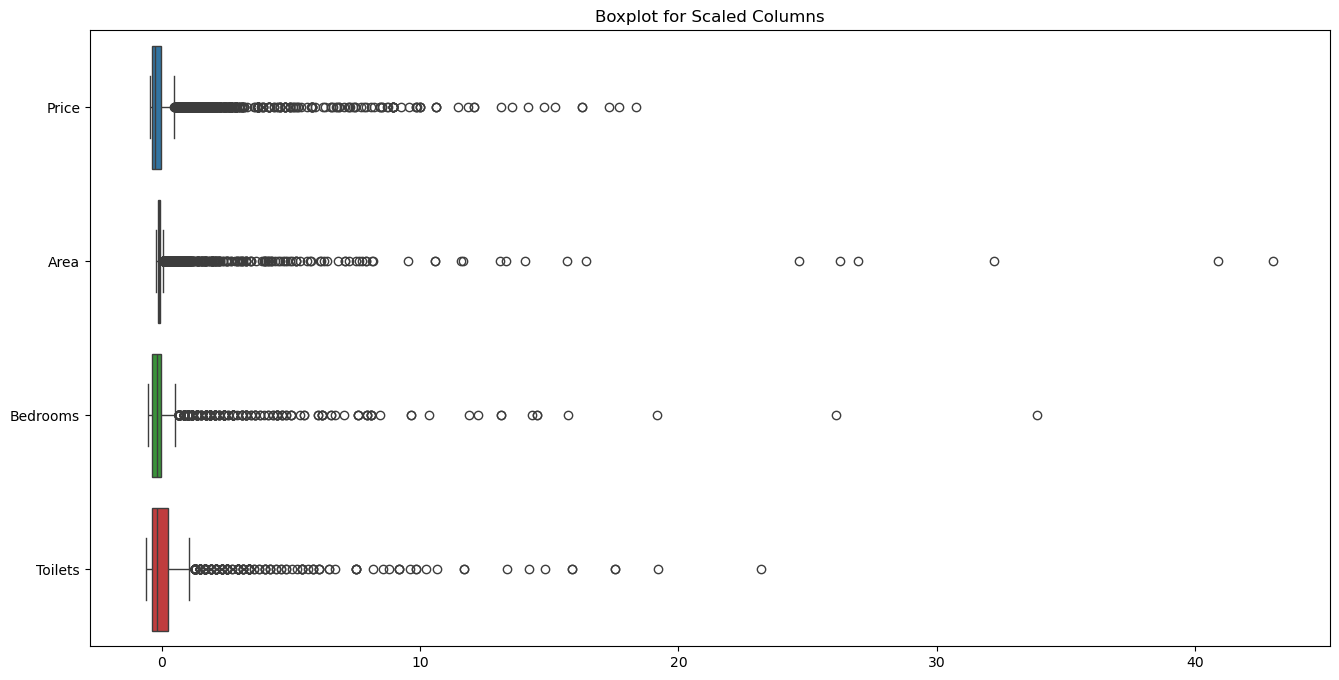

In [343]:
# Lọc các cột numeric
df_numeric = df.select_dtypes(include=['number'])

# Chuẩn hóa dữ liệu bằng StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Tạo một figure có size 16, 8
plt.figure(figsize=(16, 8))

# Vẽ boxplot cho dữ liệu đã chuẩn hóa
sns.boxplot(data=df_scaled, orient='h')

# Thêm tiêu đề và nhãn
plt.title('Boxplot for Scaled Columns')
plt.show()

**Nhận xét**:
- Quan sát biểu đồ boxplot chúng ta dễ dàng thấy được rằng dữ liệu có sự phân bố không đều, có nhiều điểm dữ liệu nằm ngoài ranh giới

- Chúng ta sẽ xử lý ngoại lai ở 2 cột Price và Area, cột Bedrooms và Toilets sẽ được xử lý sau khi được điền dữ liệu thiếu.

##### **Xử lý dữ liệu ngoại lai cho cột Price**

In [344]:
# Thiết kế hàm loại bỏ Outlier 
import pandas as pd

# Hàm loại bỏ outlier theo phương pháp IQR
def remove_outliers_iqr(df, column, threshold=4.0):
    """
    Loại bỏ các giá trị outlier trong một cột dựa trên phương pháp IQR.

    Parameters:
    - df: DataFrame cần xử lý.
    - column: Tên cột cần loại bỏ outlier.
    - threshold: Ngưỡng để xác định outlier (mặc định là 4.0).

    Returns:
    - DataFrame đã loại bỏ outlier.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Định nghĩa ngưỡng
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Loại bỏ outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [345]:
# Áp dụng hàm cho các cột cần loại bỏ outlier
df = remove_outliers_iqr(df, 'Price', threshold=4.0)

# Kiểm tra thông tin dữ liệu sau khi loại bỏ outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9869 entries, 0 to 30359
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         9869 non-null   float64       
 1   Address       9869 non-null   object        
 2   Area          9869 non-null   float64       
 3   Bedrooms      6824 non-null   float64       
 4   Toilets       6523 non-null   float64       
 5   Published At  9869 non-null   datetime64[ns]
 6   Loại tin      9869 non-null   object        
 7   Status        9869 non-null   object        
 8   Developer     9869 non-null   object        
 9   Street        9869 non-null   object        
 10  District      9869 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 925.2+ KB


##### **Loại bỏ ngoại lai cho cột Area**

In [346]:

# Áp dụng hàm cho các cột cần loại bỏ outlier
df = remove_outliers_iqr(df, 'Area', threshold=4.0)

# Kiểm tra thông tin dữ liệu sau khi loại bỏ outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9544 entries, 0 to 30359
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         9544 non-null   float64       
 1   Address       9544 non-null   object        
 2   Area          9544 non-null   float64       
 3   Bedrooms      6760 non-null   float64       
 4   Toilets       6459 non-null   float64       
 5   Published At  9544 non-null   datetime64[ns]
 6   Loại tin      9544 non-null   object        
 7   Status        9544 non-null   object        
 8   Developer     9544 non-null   object        
 9   Street        9544 non-null   object        
 10  District      9544 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 894.8+ KB


#### f. Điền thông tin bị thiếu cho cột Bedrooms và Toilets (Handling missing values)

##### **Điền thông tin bị thiếu cho cột Bedroom và Tolets thông qua phương pháp Regression Imputation**

In [347]:
# Hàm để điền giá trị thiếu cho bedroom vs toilets
def fill_missing(group):
    # Xử lý cho Bedrooms
    if group['Bedrooms'].isnull().any():
        if group['Bedrooms'].notnull().sum() > 1:  # Đảm bảo có đủ dữ liệu tính tương quan
            slope_bedrooms = group['Bedrooms'].mean() / group['Area'].mean()
            group['Bedrooms'] = group['Bedrooms'].fillna(group['Area'] * slope_bedrooms)
    
    # Làm tròn các giá trị không phải NaN
    group['Bedrooms'] = group['Bedrooms'].apply(lambda x: round(x) if pd.notnull(x) else x)
    
    # Xử lý cho Toilets
    if group['Toilets'].isnull().any():
        if group['Toilets'].notnull().sum() > 1:  # Đảm bảo có đủ dữ liệu tính tương quan
            slope_toilets = group['Toilets'].mean() / group['Area'].mean()
            group['Toilets'] = group['Toilets'].fillna(group['Area'] * slope_toilets)
    
    # Làm tròn các giá trị không phải NaN
    group['Toilets'] = group['Toilets'].apply(lambda x: round(x) if pd.notnull(x) else x)
    
    return group

# Gom nhóm theo Street và District rồi áp dụng hàm
df = df.groupby(['Street', 'District']).apply(fill_missing)
df = df.reset_index(drop=True)

# Điền mean toàn cột nếu vẫn còn giá trị NaN
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Toilets'] = df['Toilets'].fillna(df['Toilets'].mean())

# Làm tròn lại các giá trị trung bình
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: round(x) if pd.notnull(x) else x)
df['Toilets'] = df['Toilets'].apply(lambda x: round(x) if pd.notnull(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         9544 non-null   float64       
 1   Address       9544 non-null   object        
 2   Area          9544 non-null   float64       
 3   Bedrooms      9544 non-null   int64         
 4   Toilets       9544 non-null   int64         
 5   Published At  9544 non-null   datetime64[ns]
 6   Loại tin      9544 non-null   object        
 7   Status        9544 non-null   object        
 8   Developer     9544 non-null   object        
 9   Street        9544 non-null   object        
 10  District      9544 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 820.3+ KB


##### **Khảo sát lại Outlier**

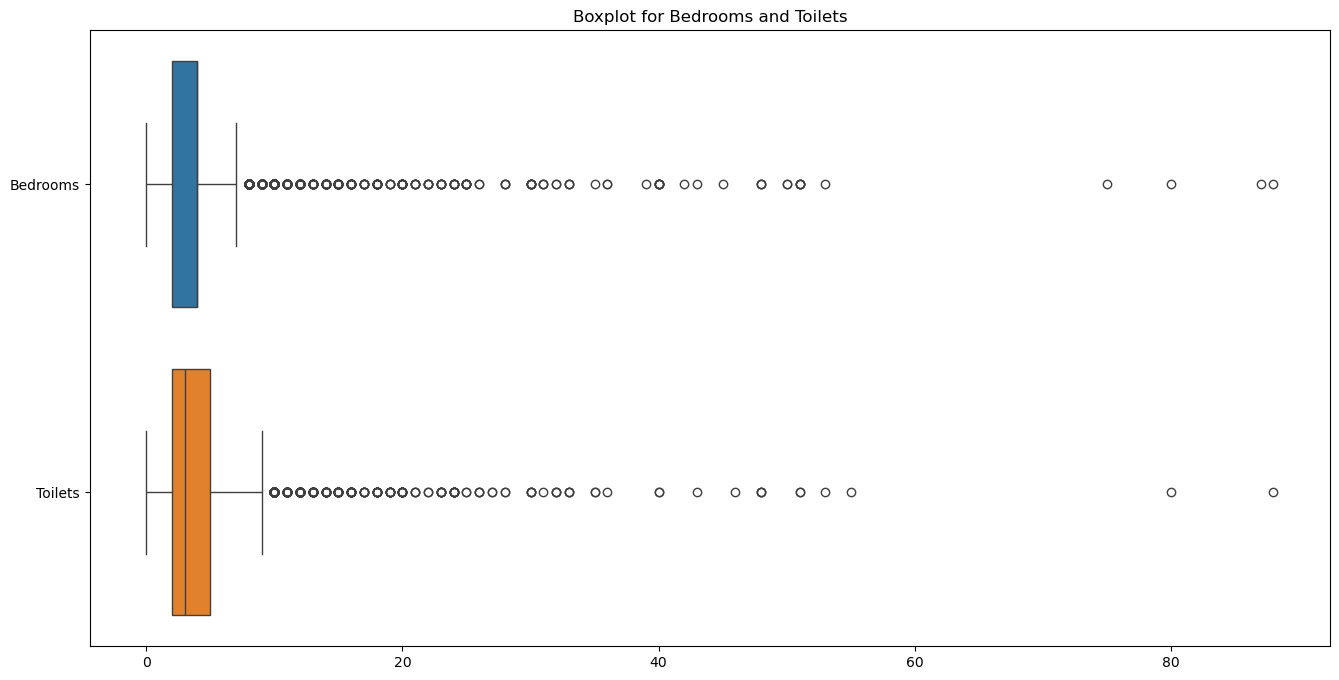

In [348]:
df_visual = df[["Bedrooms", "Toilets"]]

# Tạo một figure có size 16, 8
plt.figure(figsize=(16, 8))

# Vẽ boxplot cho dữ liệu
sns.boxplot(data=df_visual, orient='h')

# Thêm tiêu đề và nhãn
plt.title('Boxplot for Bedrooms and Toilets')
plt.show()

**Xử lý Outlier cho cột Bedrooms và Toilets**

In [349]:
# Áp dụng hàm cho các cột cần loại bỏ outlier
df = remove_outliers_iqr(df, 'Bedrooms', threshold=4.0)
df = remove_outliers_iqr(df, 'Toilets', threshold=4.0)

# Kiểm tra thông tin dữ liệu sau khi loại bỏ outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 0 to 9543
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         9327 non-null   float64       
 1   Address       9327 non-null   object        
 2   Area          9327 non-null   float64       
 3   Bedrooms      9327 non-null   int64         
 4   Toilets       9327 non-null   int64         
 5   Published At  9327 non-null   datetime64[ns]
 6   Loại tin      9327 non-null   object        
 7   Status        9327 non-null   object        
 8   Developer     9327 non-null   object        
 9   Street        9327 non-null   object        
 10  District      9327 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 874.4+ KB


### 2. Gộp dữ liệu từ giá đề xuất của chính phủ và xử lý thêm

#### a. Tích hợp dữ liệu từ chính phủ

##### **Đọc dữ liệu** 

In [350]:
# Đọc dữ liệu từ file
gbd_path = './gbd.csv'
df_gbd = pd.read_csv(gbd_path)
df_gbd.head()

,TÊN ĐƯỜNG,QUẬN,Giá đất đề nghị điều chỉnh
0,Đường số 9A\n(KDC Trung Sơn),Bình Chánh,153000.0
1,Đường số 9\n(KDC Him Lam - Khu chức năng số 7),Bình Chánh,145400.0
2,Đường số 8\n(KDC Trung Sơn),Bình Chánh,114800.0
3,Đường số 1\n(KDC Dương Hồng 9B4),Bình Chánh,107100.0
4,Đường số 1\n(KDC Đại Phúc 9B8),Bình Chánh,107100.0


##### **Xử lý dữ liệu đường và quận để đảm bảo độ đồng nhất**

In [351]:
# Chuyển các cột dữ liệu đường và quận sang dạng lowercase 
df_gbd['Street'] = df_gbd['TÊN ĐƯỜNG'].str.lower()
df_gbd['District'] = df_gbd['QUẬN'].str.lower()
df_gbd.head()

,TÊN ĐƯỜNG,QUẬN,Giá đất đề nghị điều chỉnh,Street,District
0,Đường số 9A\n(KDC Trung Sơn),Bình Chánh,153000.0,đường số 9a\n(kdc trung sơn),bình chánh
1,Đường số 9\n(KDC Him Lam - Khu chức năng số 7),Bình Chánh,145400.0,đường số 9\n(kdc him lam - khu chức năng số 7),bình chánh
2,Đường số 8\n(KDC Trung Sơn),Bình Chánh,114800.0,đường số 8\n(kdc trung sơn),bình chánh
3,Đường số 1\n(KDC Dương Hồng 9B4),Bình Chánh,107100.0,đường số 1\n(kdc dương hồng 9b4),bình chánh
4,Đường số 1\n(KDC Đại Phúc 9B8),Bình Chánh,107100.0,đường số 1\n(kdc đại phúc 9b8),bình chánh


##### **Xây dựng các hàm xử lý cần thiết để tích hợp dữ liệu**

In [352]:
# Giá trung bình của đất nơi dự án
def calculate_avg_district_prices(df_gbd):
    district_avg_prices = {}

    # Group by district and calculate the average of 'Giá đất đề nghị điều chỉnh'
    for district in df_gbd['District'].unique():
        # Filter data for the district
        district_data = df_gbd[df_gbd['District'] == district].copy()
        
        # Ensure 'Giá đất đề nghị điều chỉnh' is numeric and calculate the average
        district_data.loc[:, 'Giá đất đề nghị điều chỉnh'] = pd.to_numeric(district_data['Giá đất đề nghị điều chỉnh'], errors='coerce')
        
        # Calculate the average price for the district
        avg_price = district_data['Giá đất đề nghị điều chỉnh'].mean()
        district_avg_prices[district] = avg_price.round(1)

    return district_avg_prices

district_avg_prices = calculate_avg_district_prices(df_gbd)
district_avg_prices

{'bình chánh': 25803.6,
 'bình thạnh': 105035.1,
 'bình tân': 45781.5,
 'cần giờ': 7238.9,
 'củ chi': 8990.8,
 'gò vấp': 70582.8,
 'hóc môn': 20194.9,
 'nhà bè': 32532.2,
 'phú nhuận': 124477.2,
 'quận 1': 267213.5,
 'quận 10': 131008.0,
 'quận 11': 115061.3,
 'quận 12': 44303.1,
 'quận 2': 59327.7,
 'quận 3': 213742.9,
 'quận 4': 138849.4,
 'quận 5': 139679.4,
 'quận 6': 92683.3,
 'quận 7': 80628.4,
 'quận 8': 61907.2,
 'quận 9': 59327.7,
 'thủ đức': 59327.7,
 'tân bình': 101933.8,
 'tân phú': 74354.5}

In [353]:
# Hàm kiểm tra xem Street của df có chứa trong tên đường của df_gbd và District có trùng không
def assign_district_price(row, df_gbd, district_avg_prices):
    # Chuẩn hóa các cột street và district về lowercase
    street = row['Street'].lower()
    district = row['District'].lower()
    
    # Tìm kiếm các tên đường trong df_gbd
    street_match = df_gbd[df_gbd['Street'].apply(lambda x: street in x.lower())]  # Chuyển tất cả thành lowercase
    print(f"Processing address: {row['Street']}, Found {len(street_match)} matches")  # Debug print cho street
    
    # Nếu có tìm thấy các tên đường trùng khớp
    for idx, match in street_match.iterrows():
        street_name = match['Street'].lower()
        district_gbd = match['District'].lower()

        # Kiểm tra xem District có trùng không
        if district == district_gbd:
            print(f"Found match: Street = {street_name}, District = {district_gbd}")
            price = match['Giá đất đề nghị điều chỉnh']
            return district, price  # Trả về giá đất từ df_gbd nếu trùng tên đường và quận

    # Nếu không có tên đường trùng, kiểm tra chỉ trùng quận và gán giá trung bình
    if district in district_avg_prices:
        price = district_avg_prices[district]
        print(f"No street match, but found average price for district {district}: {price}")
        return district, price

    # Nếu không có kết quả khớp, trả về None
    # print(f"No match found for address: {row['Street']}")
    return None, None

##### **Tích hợp dữ liệu**

In [354]:

# Áp dụng hàm assign_district_price cho từng dòng trong df
df[['District', 'Suggested Price']] = df.apply(lambda row: pd.Series(assign_district_price(row, df_gbd, district_avg_prices)), axis=1)

# Hiển thị thông tin sau khi gán giá
df.head()

Processing address: 1, Found 1582 matches
Found match: Street = đường số 1
(kdc dương hồng 9b4), District = bình chánh
Processing address: 1, Found 1582 matches
Found match: Street = đường số 1
(kdc dương hồng 9b4), District = bình chánh
Processing address: 1, Found 1582 matches
Found match: Street = đường số 19, phường bình trị đông b, District = bình tân
Processing address: 1, Found 1582 matches
Found match: Street = đường số 19, phường bình trị đông b, District = bình tân
Processing address: 1, Found 1582 matches
Found match: Street = đường số 19, phường bình trị đông b, District = bình tân
Processing address: 1, Found 1582 matches
Found match: Street = tô ký (tỉnh lộ 15 cũ), District = quận 12
Processing address: 1, Found 1582 matches
Found match: Street = đường b12, phường an lợi đông, District = quận 2
Processing address: 1, Found 1582 matches
Found match: Street = đường b12, phường an lợi đông, District = quận 2
Processing address: 1, Found 1582 matches
Found match: Street = tân

,Price,Address,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District,Suggested Price
0,7.50,"Đường 1, Xã Bình Hưng, Bình Chánh, Hồ Chí Minh",85.0,4,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107100.0
1,23.00,"Đường 1, Phường Hiệp Bình Chánh, Thủ Đức, Hồ C...",230.0,5,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107100.0
2,4.99,"Đường 1, Phường Bình Hưng Hòa A, Bình Tân, Hồ ...",52.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0
3,4.25,"Đường 1, Phường Bình Hưng Hòa A, Bình Tân, Hồ ...",46.0,2,2,2024-10-28,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0
4,4.85,"Đường 1, Phường An Lạc, Bình Tân, Hồ Chí Minh",67.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 0 to 9543
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Price            9327 non-null   float64       
 1   Address          9327 non-null   object        
 2   Area             9327 non-null   float64       
 3   Bedrooms         9327 non-null   int64         
 4   Toilets          9327 non-null   int64         
 5   Published At     9327 non-null   datetime64[ns]
 6   Loại tin         9327 non-null   object        
 7   Status           9327 non-null   object        
 8   Developer        9327 non-null   object        
 9   Street           9327 non-null   object        
 10  District         9327 non-null   object        
 11  Suggested Price  9327 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 947.3+ KB


**Nhận xét**:
- Tất cả dữ liệu đã được xử lý thông tin về đường quận, dữ liệu đã được tích hợp thành công.

- Cột Address sau khi được trích lấy thông tin cần thiết nên được loại bỏ khỏi tập dữ liệu 

- Cột Suggested Price nên được chuẩn hóa về ``triệu/m2`` thay vì ``nghìn/m2``


##### **Cột Address sau khi được tách ra thành các cột nên được loại bỏ**

In [356]:
df.drop(columns=["Address"], inplace=True)
df.head()

,Price,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District,Suggested Price
0,7.50,85.0,4,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107100.0
1,23.00,230.0,5,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107100.0
2,4.99,52.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0
3,4.25,46.0,2,2,2024-10-28,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0
4,4.85,67.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98800.0


##### **Cột Suggested Price nên được chuẩn hóa về triệu/m2 để phù hợp hơn**

In [357]:
df["Suggested Price"] = df["Suggested Price"] / 1000.0
df["Suggested Price"].round(1)
df.head()

,Price,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District,Suggested Price
0,7.50,85.0,4,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1
1,23.00,230.0,5,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1
2,4.99,52.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8
3,4.25,46.0,2,2,2024-10-28,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8
4,4.85,67.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8


### 3. Xử lý dữ liêu nâng cao

#### a. Tạo thêm cột triệu/m2 để phục vụ cho quá trình phân tích

In [358]:
# Đơn vị Price là tỷ nên cần chuyển sang triệu trước khi tính toán giá trên diện tíchtích
df["Million/m2"] = df["Price"] * 1000.00 / df["Area"] 
df["Million/m2"] = df["Million/m2"].round(2)
df.head()

,Price,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District,Suggested Price,Million/m2
0,7.50,85.0,4,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1,88.24
1,23.00,230.0,5,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1,100.00
2,4.99,52.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,95.96
3,4.25,46.0,2,2,2024-10-28,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,92.39
4,4.85,67.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,72.39


#### b. Tạo cột giá đường, quận để phục vụ cho việc xây dựng mô hình

In [359]:
# Tính toán meadian giá của khu vực quận (theo giá thực tế)
df['District Price'] = df["District"].map(
    df.groupby("District")["Price"].median()
)

# Tính giá trung vị cho từng Đường (trong từng Quận) và thêm cột "Giá Đường"
median_gia_duong = df.groupby(["Street", "District"])["Price"].median()
df["Street Price"] = df.set_index(["Street", "District"]).index.map(median_gia_duong)

df.head()

,Price,Area,Bedrooms,Toilets,Published At,Loại tin,Status,Developer,Street,District,Suggested Price,Million/m2,District Price,Street Price
0,7.50,85.0,4,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1,88.24,4.500,15.25
1,23.00,230.0,5,6,2024-10-24,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình chánh,107.1,100.00,4.500,15.25
2,4.99,52.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,95.96,5.225,4.85
3,4.25,46.0,2,2,2024-10-28,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,92.39,5.225,4.85
4,4.85,67.0,3,2,2024-10-25,Tin thường,Đã bàn giao,cá nhân/môi giới,1,bình tân,98.8,72.39,5.225,4.85


### 4. Kết quả 


##### **Tổng quan dữ liệu đã được xử lý**

In [360]:
df.describe()

,Price,Area,Bedrooms,Toilets,Published At,Suggested Price,Million/m2,District Price,Street Price
count,9327.000000,9327.000000,9327.000000,9327.000000,9327,9327.000000,9327.000000,9327.000000,9327.000000
mean,13.506486,102.191757,3.751689,3.652085,2024-10-23 09:03:55.059504640,104.122104,126.160639,9.347336,11.266900
min,0.001050,7.000000,0.000000,0.000000,2024-09-27 00:00:00,4.700000,0.010000,1.150000,0.001050
25%,4.150000,61.000000,2.000000,2.000000,2024-10-23 00:00:00,59.327700,57.995000,6.500000,5.059120
50%,7.800000,83.000000,4.000000,3.000000,2024-10-24 00:00:00,81.800000,97.670000,8.200000,7.450000
75%,16.400000,121.000000,4.000000,5.000000,2024-10-26 00:00:00,132.000000,161.990000,11.500000,14.000000
max,86.000000,405.300000,12.000000,16.000000,2024-10-31 00:00:00,687.200000,5320.000000,24.000000,85.000000
std,15.029124,63.206813,1.936835,2.040235,NaN,65.195127,115.112346,4.603128,10.069088


**Nhận xét**:
- Sau khi xử lý dữ liệu từ một tập dữ liệu có 30,060 dòng dữ liệu chúng ta nhận được một tập dữ liệu có 5487 dòng dữ liệu. 

- Các thông số nằm ở ngưỡng hợp lý cho các bước phân tích tiếp theo.

##### **Lưu dữ liệu vào file csv để phục vụ cho phân tích sau này**

In [361]:
df.to_csv('cleaned_data.csv', index=False)